# Driver type Classification - Supervised (Label-encoding)

## 1. Exploratory Data Analysis

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [2]:
dataset_fcd = pd.read_csv("/kaggle/input/data-fcd/dataset_fcd_col.csv")
dataset_fcd.head()

,time,id,x,y,angle,type,speed,pos,lane,slope,...,NOx,PMx,fuel,electricity,noise,route,waiting,collision_type,collision_occurred,InvolvedParties
0,0.0,myflow.0,-194.90,-4.8,90.0,speeder,0.00,5.10,E0_0,0.0,...,1.20,0.07,837.22,0.0,55.94,rd1#1,0.0,No collision,0,Not involved
1,0.1,myflow.0,-194.90,-4.8,90.0,speeder,0.03,5.10,E0_0,0.0,...,1.20,0.07,836.72,0.0,57.21,rd1#1,0.1,No collision,0,Not involved
2,0.2,myflow.0,-194.89,-4.8,90.0,speeder,0.08,5.11,E0_0,0.0,...,1.20,0.07,837.45,0.0,58.30,rd1#1,0.2,No collision,0,Not involved
3,0.3,myflow.0,-194.87,-4.8,90.0,speeder,0.18,5.13,E0_0,0.0,...,1.21,0.07,843.70,0.0,60.13,rd1#1,0.0,No collision,0,Not involved
4,0.4,myflow.0,-194.84,-4.8,90.0,speeder,0.33,5.16,E0_0,0.0,...,1.24,0.07,866.36,0.0,62.88,rd1#1,0.0,No collision,0,Not involved


In [3]:
dataset_fcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137254 entries, 0 to 137253
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   time                137254 non-null  float64
 1   id                  137254 non-null  object 
 2   x                   137254 non-null  float64
 3   y                   137254 non-null  float64
 4   angle               137254 non-null  float64
 5   type                137254 non-null  object 
 6   speed               137254 non-null  float64
 7   pos                 137254 non-null  float64
 8   lane                137254 non-null  object 
 9   slope               137254 non-null  float64
 10  signals             137254 non-null  int64  
 11  acceleration        137254 non-null  float64
 12  distance            137254 non-null  float64
 13  eclass              137254 non-null  object 
 14  CO2                 137254 non-null  float64
 15  CO                  137254 non-nul

In [4]:
dataset_fcd.describe()

,time,x,y,angle,speed,pos,slope,signals,acceleration,distance,CO2,CO,HC,NOx,PMx,fuel,electricity,noise,waiting,collision_occurred
count,137254.000000,137254.000000,137254.000000,137254.000000,137254.000000,137254.000000,137254.0,137254.000000,137254.000000,137254.000000,137254.000000,137254.000000,137254.000000,137254.000000,137254.000000,137254.000000,137254.0,137254.000000,137254.000000,137254.000000
mean,536.094381,15.683071,-15.101563,170.779438,5.866294,63.522408,0.0,2.644484,0.183982,71.064779,3061.986065,96.012417,0.507937,1.308156,0.062619,976.654227,0.0,60.525124,1.685832,0.000160
std,295.454098,91.121499,60.763682,101.774074,5.244813,52.208205,0.0,3.911282,1.546119,53.921889,3378.684869,74.465712,0.403384,1.507114,0.078506,1077.625851,0.0,6.521790,5.604385,0.012659
min,0.000000,-199.880000,-199.900000,0.000000,0.000000,0.000000,0.0,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,26.150000,0.000000,0.000000
25%,272.000000,-4.800000,-13.590000,90.000000,2.280000,20.760000,0.0,0.000000,-0.090000,30.482500,2164.107500,9.450000,0.100000,0.770000,0.020000,690.290000,0.0,56.190000,0.000000,0.000000
50%,556.500000,1.600000,-1.600000,180.030000,4.040000,53.105000,0.0,0.000000,0.000000,59.960000,2392.740000,113.990000,0.580000,1.020000,0.050000,763.220000,0.0,57.250000,0.000000,0.000000
75%,782.000000,51.857500,4.800000,270.000000,9.950000,87.990000,0.0,8.000000,0.490000,92.420000,3001.787500,155.370000,0.800000,1.220000,0.070000,957.462500,0.0,64.170000,0.000000,0.000000
max,1149.500000,249.890000,194.900000,360.000000,26.680000,189.600000,0.0,11.000000,10.320000,210.400000,50696.330000,968.870000,5.670000,23.350000,1.280000,16169.480000,0.0,108.960000,43.000000,1.000000


In [5]:
dataset_fcd = dataset_fcd.drop(['slope','electricity','route','eclass'],axis=1) # removing unnecessary variables

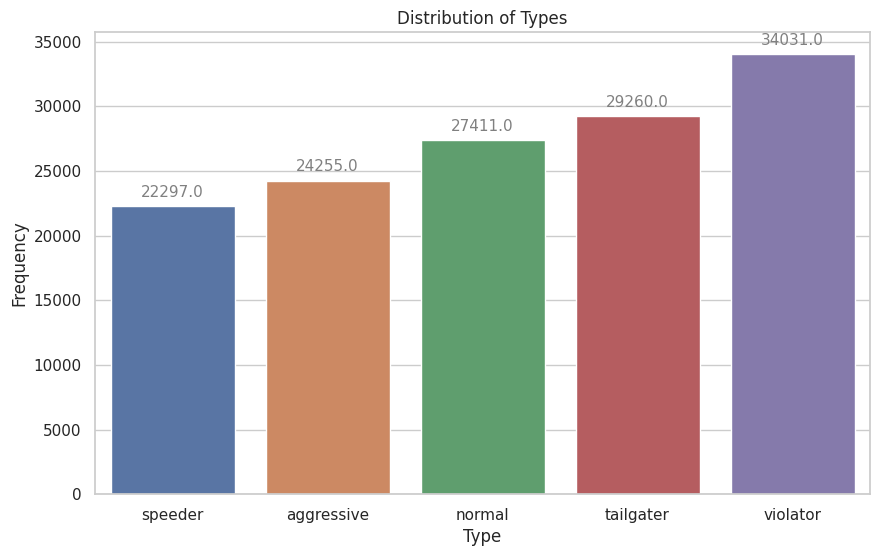

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='type', data=dataset_fcd)
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [7]:
# LABEL ENCODING
categorical_cols = dataset_fcd.select_dtypes(include=['object']).columns.drop(['type'])
dataset_label_encoded = dataset_fcd.copy()

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    dataset_label_encoded[col] = label_encoders[col].fit_transform(dataset_label_encoded[col])

target_encoder = LabelEncoder()
dataset_label_encoded['type'] = target_encoder.fit_transform(dataset_label_encoded['type'])
dataset_label_encoded

,time,id,x,y,angle,type,speed,pos,lane,signals,...,CO,HC,NOx,PMx,fuel,noise,waiting,collision_type,collision_occurred,InvolvedParties
0,0.0,0,-194.90,-4.80,90.0,2,0.00,5.10,11,0,...,164.78,0.81,1.20,0.07,837.22,55.94,0.0,0,0,0
1,0.1,0,-194.90,-4.80,90.0,2,0.03,5.10,11,8,...,164.24,0.81,1.20,0.07,836.72,57.21,0.1,0,0,0
2,0.2,0,-194.89,-4.80,90.0,2,0.08,5.11,11,8,...,163.35,0.81,1.20,0.07,837.45,58.30,0.2,0,0,0
3,0.3,0,-194.87,-4.80,90.0,2,0.18,5.13,11,0,...,162.11,0.80,1.21,0.07,843.70,60.13,0.0,0,0,0
4,0.4,0,-194.84,-4.80,90.0,2,0.33,5.16,11,0,...,160.87,0.80,1.24,0.07,866.36,62.88,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137249,1149.1,110,-4.80,-199.06,180.0,3,2.07,99.06,23,0,...,125.23,0.62,1.04,0.05,762.41,56.78,0.0,0,0,0
137250,1149.2,110,-4.80,-199.27,180.0,3,2.07,99.27,23,0,...,125.23,0.62,1.04,0.05,762.44,56.78,0.0,0,0,0
137251,1149.3,110,-4.80,-199.48,180.0,3,2.07,99.48,23,0,...,125.23,0.62,1.04,0.05,762.41,56.78,0.0,0,0,0
137252,1149.4,110,-4.80,-199.68,180.0,3,2.07,99.68,23,0,...,125.23,0.62,1.04,0.05,762.44,56.78,0.0,0,0,0


#### Feature Selection for Classification

In [8]:
# Chi-squared test - FOR CATEGORICAL VARIABLE
chi2_stat = {}
for col in categorical_cols:
    chi2_val, p_val = chi2_contingency(pd.crosstab(dataset_fcd['type'], dataset_fcd[col]))[:2]
    chi2_stat[col] = {'chi2_value': chi2_val, 'p_value': p_val}

chi2_results = pd.DataFrame(chi2_stat).T.sort_values(by='p_value')
chi2_results

,chi2_value,p_value
id,549016.000000,0.000000
lane,26989.267686,0.000000
InvolvedParties,23.589592,0.002684
collision_type,13.015389,0.111321


**Chi-Square test of Independence for Categorical Feature Selction**

Null-Hypothesis:  There is no association between the two categorical variables

For feature selection the target variable should be dependent on the features, for chi-value to be statisitcally significant p-value < 0.05 (95% confidence interval)

After the test it is evident that 'id','lane' and 'InvolvedParties' features are statistically significant (p < 0.05). 

'id' will not be consider as it is unique representation of the vehicle. We will consider 'lane' and 'InvolvedParties' for classification.

In [9]:
# ANOVA F-Test - FOR NUMERICAL VARIABLE
def anova_test(data, binary_type_column):
    numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
    f_values, p_values = f_classif(data[numerical_features], data[binary_type_column])
    anova_results = pd.DataFrame({'Feature': numerical_features, 'F-value': f_values, 'p-value': p_values})
    return anova_results.sort_values('F-value', ascending=False)

# We will start with 'type_aggressive'
anova_results = anova_test(dataset_fcd, 'type')
anova_results

,Feature,F-value,p-value
0,time,1526.402919,0.000000e+00
4,speed,1328.807056,0.000000e+00
6,signals,1203.602078,0.000000e+00
15,noise,953.258781,0.000000e+00
10,CO,782.023969,0.000000e+00
11,HC,629.224254,0.000000e+00
13,PMx,539.141936,0.000000e+00
3,angle,481.076824,0.000000e+00
12,NOx,446.859856,0.000000e+00
16,waiting,427.311871,0.000000e+00


**ANOVA (Analysis of Variance) test for Numerical Variable**

Null-hypothesis: There are no significant differences between the group means of numerical variable defined by the categorical variable. 

For feature selection, there should be difference in the group means i.e. p < 0.05 (95% confidence interval) 

The test results shows that all features have statistical significance in terms of their association with the 'type' of driver, as their p-values were less than 0.05. 

We will not consider all feartures, so we will further check feature intercation to eleminate highly correlated features.

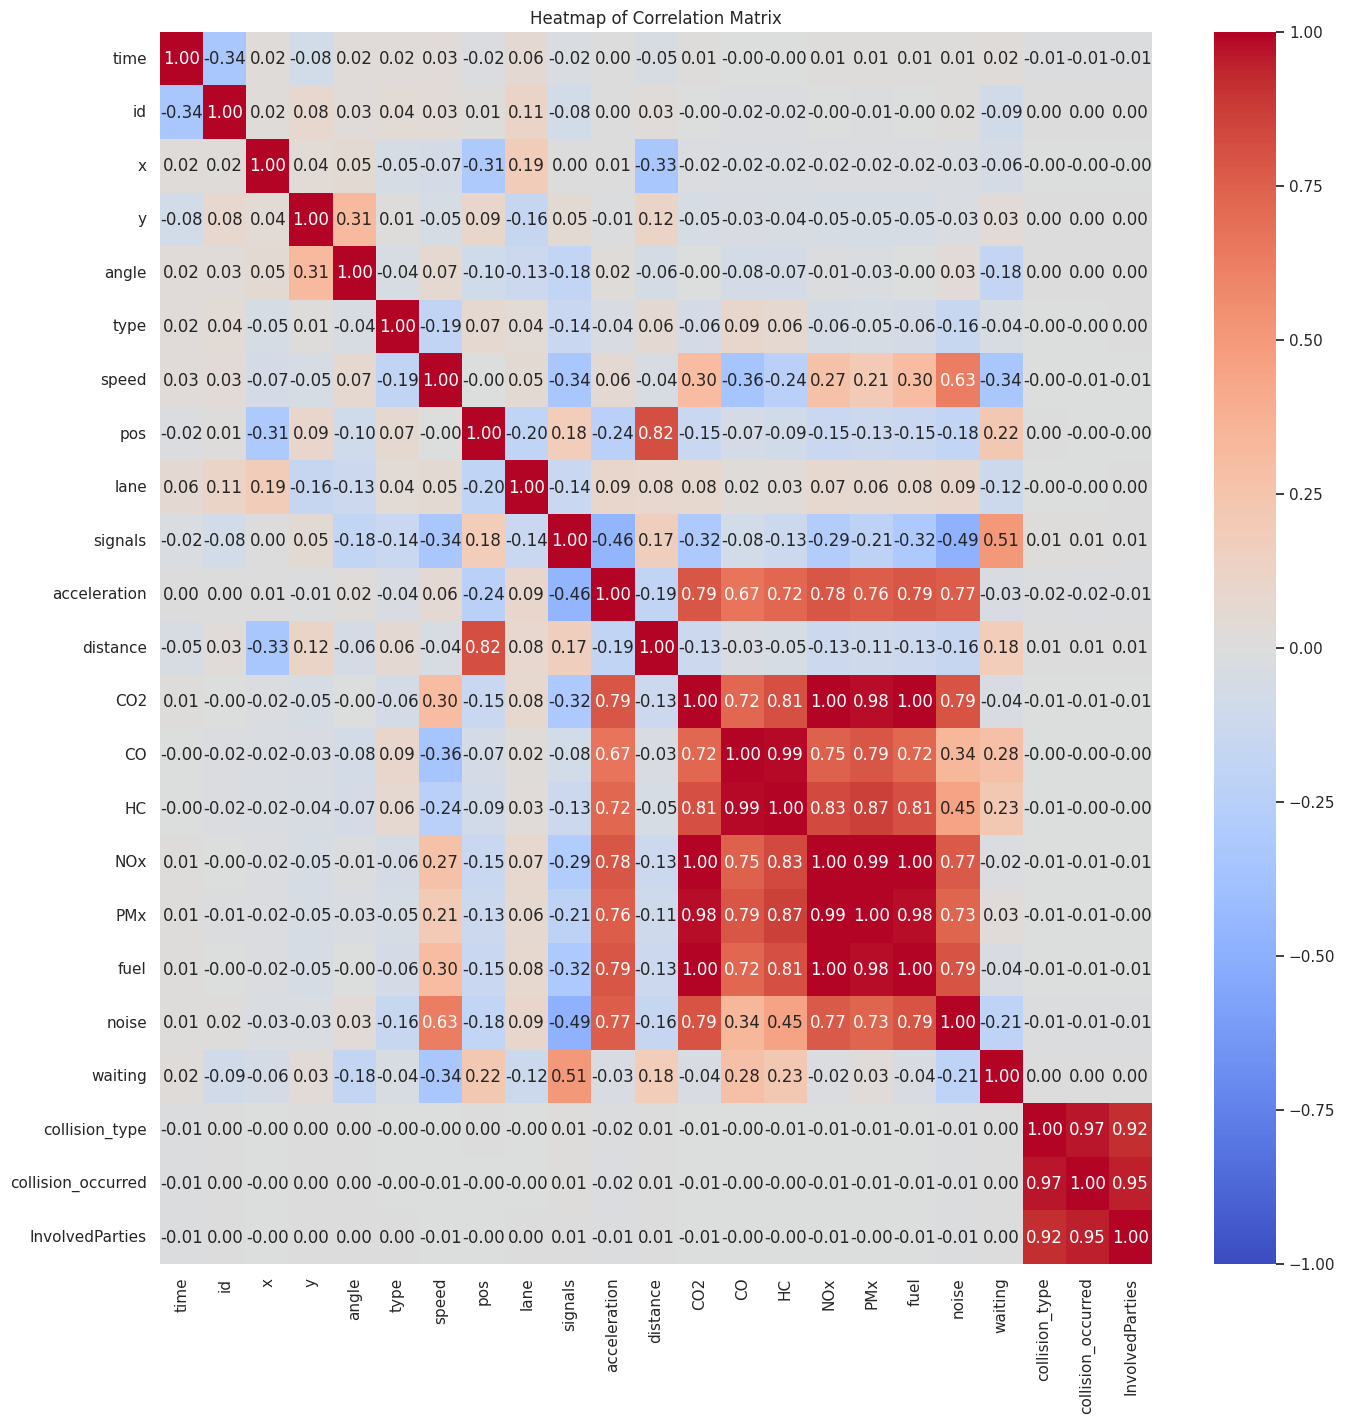

In [13]:
correlation_matrix = dataset_label_encoded.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Considering practical and statistical analysis, we will select

Categorical Variables: lane and InvolvedParties

Numerical Variables: time, speed, signals, noise, fuel, CO, x, y, angle, pos, accelaration, distance, waiting

Variables not cosidered: 
1. CO2, PMx, NOx as they have correlation of approx 1 with fuel, so any one of these variable will work. I chose fuel consumption as it can be measured easily.
2. HC as it was heavily correlated with CO
3. id as it is unique
4. collision_type as its not statistically significant
4. collision_occured as it is highly correlated with InvolvedParties

In [13]:
# Selecting features
dataset_classif = dataset_label_encoded.drop(['collision_occurred', 'collision_type', 'CO2','HC','PMx','NOx','id'], axis=1)
classification_df = dataset_classif.copy()
classification_df

,time,x,y,angle,type,speed,pos,lane,signals,acceleration,distance,CO,fuel,noise,waiting,InvolvedParties
0,0.0,-194.90,-4.80,90.0,2,0.00,5.10,11,0,0.00,5.10,164.78,837.22,55.94,0.0,0
1,0.1,-194.90,-4.80,90.0,2,0.03,5.10,11,8,0.29,5.10,164.24,836.72,57.21,0.1,0
2,0.2,-194.89,-4.80,90.0,2,0.08,5.11,11,8,0.53,5.11,163.35,837.45,58.30,0.2,0
3,0.3,-194.87,-4.80,90.0,2,0.18,5.13,11,0,0.94,5.13,162.11,843.70,60.13,0.0,0
4,0.4,-194.84,-4.80,90.0,2,0.33,5.16,11,0,1.55,5.16,160.87,866.36,62.88,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137249,1149.1,-4.80,-199.06,180.0,3,2.07,99.06,23,0,-0.00,99.06,125.23,762.41,56.78,0.0,0
137250,1149.2,-4.80,-199.27,180.0,3,2.07,99.27,23,0,0.00,99.27,125.23,762.44,56.78,0.0,0
137251,1149.3,-4.80,-199.48,180.0,3,2.07,99.48,23,0,-0.00,99.48,125.23,762.41,56.78,0.0,0
137252,1149.4,-4.80,-199.68,180.0,3,2.07,99.68,23,0,0.00,99.68,125.23,762.44,56.78,0.0,0


### Naive Bayes - Baseline Model

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [17]:
# train test split
X = classification_df.drop('type',axis=1)
y = classification_df['type']
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)

#### 1. Multinomial Naive Bayes

In [14]:
#Normalisation 
m_sc = MinMaxScaler()
X_train_mc = m_sc.fit_transform(X_train)
X_test_mc = m_sc.transform(X_test)

param_grid_mnb = param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

mnb = MultinomialNB()

grid_search_nb = GridSearchCV(estimator=mnb, param_grid=param_grid_mnb, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train_mc, y_train)

best_params = grid_search_nb.best_params_
best_score = grid_search_nb.best_score_

print("Best parameters: ",best_params, "accuracy: " ,round(best_score,4))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:  {'alpha': 2.0} accuracy:  0.2787


Test set Accuracy:  28.02 %
Precision: 0.2872
Recall: 0.2466
F1 Score: 0.1933


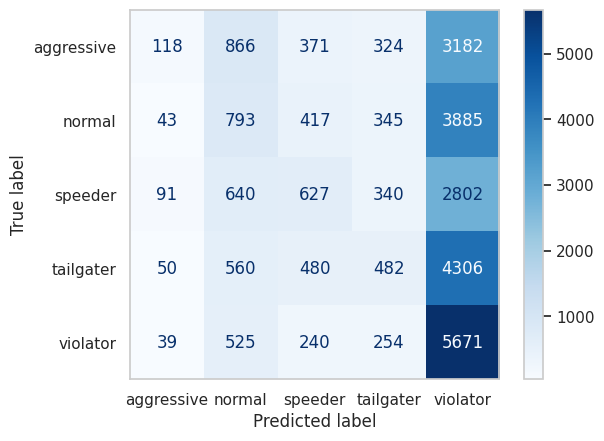

In [15]:
mnb_clf = MultinomialNB(alpha=2.0)
mnb_clf.fit(X_train_mc, y_train)
test_predict = mnb_clf.predict(X_test_mc)
acc_mnb = accuracy_score(test_predict,y_test)*100
precision = precision_score(y_test, test_predict,average='macro')
recall = recall_score(y_test, test_predict,average='macro')
f1 = f1_score(y_test, test_predict,average='macro')
conf_matrix = confusion_matrix(y_test, test_predict)
label_names = target_encoder.inverse_transform(sorted(set(y_test)))

print('Test set Accuracy: ', f'{round(acc_mnb,2)} %')
print('Precision:', round(precision,4))
print('Recall:', round(recall,4))
print('F1 Score:',round(f1,4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False) 
plt.show()

#### 2. Gausian Naive Bayes

In [16]:
#Z-score Normalisation 
z_sc = StandardScaler()
X_train_zc = z_sc.fit_transform(X_train)
X_test_zc = z_sc.transform(X_test)

param_grid_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb = GaussianNB()

grid_search_nb = GridSearchCV(estimator=gnb, param_grid=param_grid_gnb, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train_zc, y_train)

best_params = grid_search_nb.best_params_
best_score = grid_search_nb.best_score_

print("Best parameters: ",best_params, "accuracy: " ,round(best_score,4))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters:  {'var_smoothing': 0.533669923120631} accuracy:  0.365


Test set Accuracy:  37.06 %
Precision: 0.3642
Recall: 0.3503
F1 Score: 0.3414


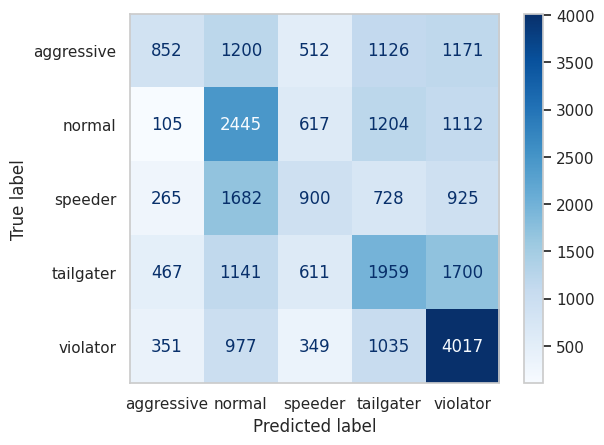

In [17]:
gnb_clf = GaussianNB(var_smoothing=0.5336)
gnb_clf.fit(X_train_zc, y_train)
test_predict = gnb_clf.predict(X_test_zc)
acc_gnb = accuracy_score(test_predict,y_test)*100
precision = precision_score(y_test, test_predict,average='macro')
recall = recall_score(y_test, test_predict,average='macro')
f1 = f1_score(y_test, test_predict,average='macro')
conf_matrix = confusion_matrix(y_test, test_predict)
label_names = target_encoder.inverse_transform(sorted(set(y_test)))

print('Test set Accuracy: ', f'{round(acc_gnb,2)} %')
print('Precision:', round(precision,4))
print('Recall:', round(recall,4))
print('F1 Score:',round(f1,4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False) 
plt.show()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import StratifiedKFold

In [90]:
knn = KNN()
param_grid_knn = {'n_neighbors':[5,10,15,20]}
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=StratifiedKFold(5), scoring='accuracy',verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train_zc,y_train)

best_params = grid_search_knn.best_params_
best_score = grid_search_knn.best_score_

print("Best parameters: ",best_params, "accuracy: " ,round(best_score,4))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters:  {'n_neighbors': 5} accuracy:  0.8312


Test set Accuracy:  84.96 %
Precision: 0.8466
Recall: 0.8476
F1 Score: 0.8457


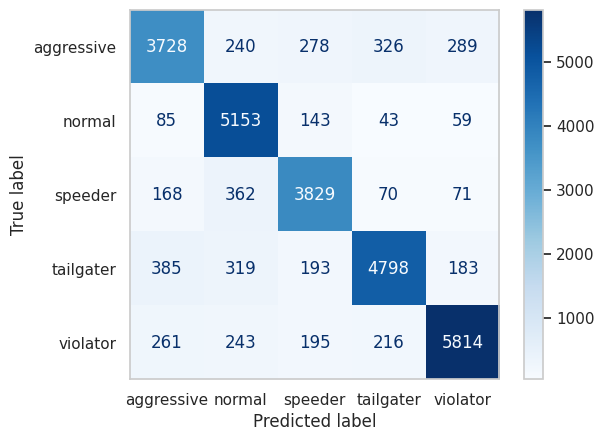

In [91]:
knn_clf = KNN(n_neighbors=5)
knn_clf.fit(X_train_zc,y_train)
test_predict = knn_clf.predict(X_test_zc)
acc_knn = accuracy_score(test_predict,y_test)*100
precision = precision_score(y_test, test_predict,average='macro')
recall = recall_score(y_test, test_predict,average='macro')
f1 = f1_score(y_test, test_predict,average='macro')
conf_matrix = confusion_matrix(y_test, test_predict)
label_names = target_encoder.inverse_transform(sorted(set(y_test)))

print('Test set Accuracy: ', f'{round(acc_knn,2)} %')
print('Precision:', round(precision,4))
print('Recall:', round(recall,4))
print('F1 Score:',round(f1,4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False) 
plt.show()

### Decision Tree Classifier

#### Considering all features

In [ ]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [101]:

def test_env(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 10, 40)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 15)
    
    clf = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state = 42
    )
    
    score = cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=StratifiedKFold(5)).mean()
    return score

study = optuna.create_study(direction='maximize')

study.optimize(test_env, n_trials=20) 

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-11-07 20:36:12,387] A new study created in memory with name: no-name-c8d03821-e00b-44b2-8535-246648eba8c1
[I 2023-11-07 20:36:12,978] Trial 0 finished with value: 0.6536162968647268 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6536162968647268.
[I 2023-11-07 20:36:17,232] Trial 1 finished with value: 0.9238363582767896 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 34, 'min_samples_split': 7, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.9238363582767896.
[I 2023-11-07 20:36:17,872] Trial 2 finished with value: 0.7962801415060263 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.9238363582767896.
[I 2023-11-07 20:36:21,027] Trial 3 finished with value: 0.9158948318633072 and parameters: {'criterion': 'gini', 'splitter': 'bes

Number of finished trials:  20
Best trial:
Value:  0.9469231591953579
Params: 
    criterion: entropy
    splitter: best
    max_depth: 29
    min_samples_split: 4
    min_samples_leaf: 6


Test set Accuracy:  95.5 %
Precision: 0.9541
Recall: 0.9546
F1 Score: 0.9543


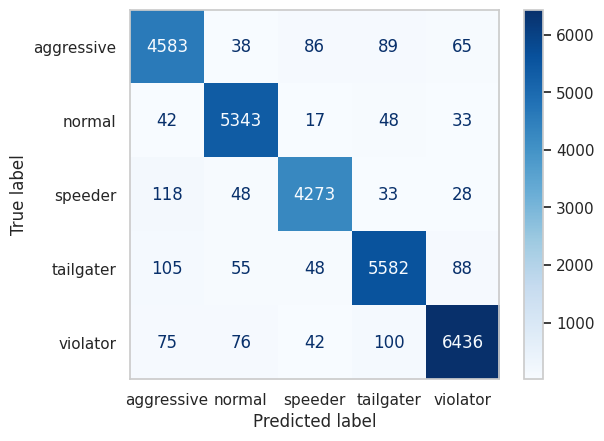

In [102]:
DT_clf = DecisionTreeClassifier(
        criterion='entropy',
        splitter='best',
        max_depth=29,
        min_samples_split=4,
        min_samples_leaf=6,
        random_state = 42
    )

DT_clf.fit(X_train,y_train)
test_predict = DT_clf.predict(X_test)
acc_DT_all = accuracy_score(test_predict,y_test)*100
precision = precision_score(y_test, test_predict,average='macro')
recall = recall_score(y_test, test_predict,average='macro')
f1 = f1_score(y_test, test_predict,average='macro')
conf_matrix = confusion_matrix(y_test, test_predict)
label_names = target_encoder.inverse_transform(sorted(set(y_test)))

print('Test set Accuracy: ', f'{round(acc_DT_all,2)} %')
print('Precision:', round(precision,4))
print('Recall:', round(recall,4))
print('F1 Score:',round(f1,4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False) 
plt.show()

#### Recursive Feature Selction Decision Tree Classifier

In [94]:
decision_tree = DecisionTreeClassifier(random_state=42)

rfecv = RFECV(estimator=decision_tree, step=1, cv=StratifiedKFold(5), scoring='accuracy')

rfecv.fit(X, y)
selected_features_indices = rfecv.get_support(indices=True)

print("Optimal number of features : %d" % rfecv.n_features_)
selected_feature_names = [X.columns[i] for i in selected_features_indices]
print("Selected Features: ",selected_feature_names)

Optimal number of features : 10
Selected Features:  ['time', 'x', 'y', 'speed', 'pos', 'lane', 'signals', 'distance', 'CO', 'noise']


In [95]:
X_dt = X[selected_feature_names]
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(np.array(X_dt), np.array(y), test_size=0.2, random_state=42)

In [98]:
def test_env(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 15)
    
    clf = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    score = cross_val_score(clf, X_train_dt, y_train_dt, n_jobs=-1, cv=StratifiedKFold(5)).mean()
    return score

study = optuna.create_study(direction='maximize')

study.optimize(test_env, n_trials=20) 

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-11-07 20:34:33,743] A new study created in memory with name: no-name-e16e5012-f4de-4f07-a85a-7fb46a4ccb3c
[I 2023-11-07 20:34:37,040] Trial 0 finished with value: 0.9249110063385257 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 23, 'min_samples_split': 14, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.9249110063385257.
[I 2023-11-07 20:34:40,390] Trial 1 finished with value: 0.9398832675643168 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 32, 'min_samples_split': 13, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.9398832675643168.
[I 2023-11-07 20:34:42,752] Trial 2 finished with value: 0.9245467694055094 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 18, 'min_samples_split': 11, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9398832675643168.
[I 2023-11-07 20:34:44,783] Trial 3 finished with value: 0.7785672697310989 and parameters: {'criterion': 'gini', 'splitter': 'best', 

Number of finished trials:  20
Best trial:
Value:  0.9679152698163633
Params: 
    criterion: entropy
    splitter: best
    max_depth: 40
    min_samples_split: 5
    min_samples_leaf: 1


Test set Accuracy:  97.27 %
Precision: 0.9724
Recall: 0.9724
F1 Score: 0.9724


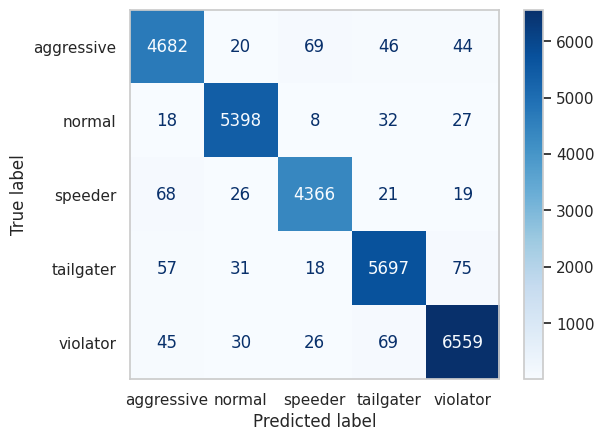

In [99]:
DT_clf = DecisionTreeClassifier(
        criterion='entropy',
        splitter='best',
        max_depth=40,
        min_samples_split=5,
        min_samples_leaf=1,
        random_state = 42
    )

DT_clf.fit(X_train_dt,y_train_dt)
test_predict = DT_clf.predict(X_test_dt)
acc_DT_sel = accuracy_score(test_predict,y_test_dt)*100
precision = precision_score(y_test_dt, test_predict,average='macro')
recall = recall_score(y_test_dt, test_predict,average='macro')
f1 = f1_score(y_test_dt, test_predict,average='macro')
conf_matrix = confusion_matrix(y_test_dt, test_predict)
label_names = target_encoder.inverse_transform(sorted(set(y_test_dt)))

print('Test set Accuracy: ', f'{round(acc_DT_sel,2)} %')
print('Precision:', round(precision,4))
print('Recall:', round(recall,4))
print('F1 Score:',round(f1,4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False) 
plt.show()

### Random Forest Classifier

#### Considering all features

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [19]:

def test_env(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 4, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    score = cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=StratifiedKFold(5)).mean()
    return score    

study = optuna.create_study(direction='maximize')

study.optimize(test_env, n_trials=50) 

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-11-08 15:54:26,679] A new study created in memory with name: no-name-e6f9e8cd-9033-4a26-a562-09c3e4afabe6
[I 2023-11-08 15:57:35,290] Trial 0 finished with value: 0.9387994639279815 and parameters: {'n_estimators': 419, 'max_depth': 41, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9387994639279815.
[I 2023-11-08 16:00:56,377] Trial 1 finished with value: 0.908117259782182 and parameters: {'n_estimators': 482, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9387994639279815.
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[I 2023-11-08 16:02:04,185] Trial 2 finished with value: 0.9371237213112267 and parameters: {'n_estimators': 152, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best i

Number of finished trials:  50
Best trial:
Value:  0.9463675513862171
Params: 
    n_estimators: 219
    max_depth: 42
    min_samples_split: 4
    min_samples_leaf: 1


Test set Accuracy:  95.68 %
Precision: 0.9557
Recall: 0.9568
F1 Score: 0.9561


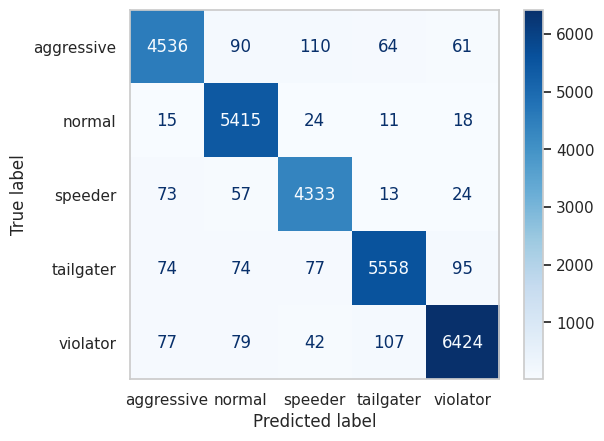

In [20]:
rf_clf = RandomForestClassifier(
        n_estimators=219,
        max_depth=42,
        min_samples_split=4,
        min_samples_leaf=1,
        random_state=42
    )

rf_clf.fit(X_train,y_train)
test_predict = rf_clf.predict(X_test)
acc_rf_all = accuracy_score(test_predict,y_test)*100
precision = precision_score(y_test, test_predict,average='macro')
recall = recall_score(y_test, test_predict,average='macro')
f1 = f1_score(y_test, test_predict,average='macro')
conf_matrix = confusion_matrix(y_test, test_predict)
label_names = target_encoder.inverse_transform(sorted(set(y_test)))

print('Test set Accuracy: ', f'{round(acc_rf_all,2)} %')
print('Precision:', round(precision,4))
print('Recall:', round(recall,4))
print('F1 Score:',round(f1,4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False) 
plt.show()

#### Recursive Feature Selction Decision Tree Classifier

In [22]:
random_forest = RandomForestClassifier(random_state=42)

rfecv = RFECV(estimator=random_forest, step=1, cv=StratifiedKFold(5), scoring='accuracy')

rfecv.fit(X, y)
selected_features_indices = rfecv.get_support(indices=True)

print("Optimal number of features : %d" % rfecv.n_features_)
selected_feature_names = [X.columns[i] for i in selected_features_indices]
print("Selected Features: ",selected_feature_names)

Optimal number of features : 15
Selected Features:  ['time', 'x', 'y', 'angle', 'speed', 'pos', 'lane', 'signals', 'acceleration', 'distance', 'CO', 'fuel', 'noise', 'waiting', 'InvolvedParties']


In [23]:
selected_feature = ['time', 'x', 'y', 'speed', 'pos', 'lane', 'signals', 'distance', 'CO', 'noise'] # chose this according to DT and personal opinion
X_dt = X[selected_feature]
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(np.array(X_dt), np.array(y), test_size=0.2, random_state=42)

In [26]:
def test_env(trial):
    n_estimators = trial.suggest_int('n_estimators', 150, 350)
    max_depth = trial.suggest_int('max_depth', 35, 55)
    min_samples_split = trial.suggest_int('min_samples_split', 4, 7)    
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=1,
        random_state=42
    )
    
    score = cross_val_score(clf, X_train_dt, y_train_dt, n_jobs=-1, cv=StratifiedKFold(5)).mean()
    return score

study = optuna.create_study(direction='maximize')

study.optimize(test_env, n_trials=20) 

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2023-11-08 19:19:17,190] A new study created in memory with name: no-name-0b66e019-7f9e-42c4-b274-5e8684f7d141
[I 2023-11-08 19:20:37,314] Trial 0 finished with value: 0.9735981715060535 and parameters: {'n_estimators': 158, 'max_depth': 49, 'min_samples_split': 4}. Best is trial 0 with value: 0.9735981715060535.
[I 2023-11-08 19:22:05,129] Trial 1 finished with value: 0.9714215318279489 and parameters: {'n_estimators': 178, 'max_depth': 37, 'min_samples_split': 7}. Best is trial 0 with value: 0.9735981715060535.
[I 2023-11-08 19:23:59,974] Trial 2 finished with value: 0.9737074432909673 and parameters: {'n_estimators': 231, 'max_depth': 42, 'min_samples_split': 5}. Best is trial 2 with value: 0.9737074432909673.
[I 2023-11-08 19:25:56,012] Trial 3 finished with value: 0.9718222401045601 and parameters: {'n_estimators': 234, 'max_depth': 42, 'min_samples_split': 7}. Best is trial 2 with value: 0.9737074432909673.
[I 2023-11-08 19:28:11,009] Trial 4 finished with value: 0.97458173327

Number of finished trials:  20
Best trial:
Value:  0.9745817332746436
Params: 
    n_estimators: 271
    max_depth: 38
    min_samples_split: 4


Test set Accuracy:  97.88 %
Precision: 0.9783
Recall: 0.9787
F1 Score: 0.9785


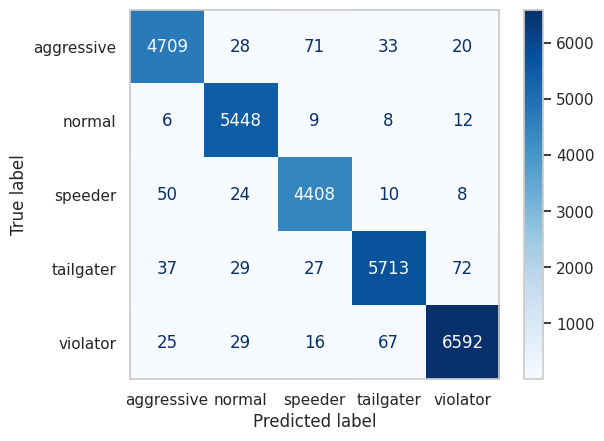

In [27]:
rf_clf = RandomForestClassifier(
        n_estimators=271,
        max_depth=38,
        min_samples_split=4,
        min_samples_leaf=1,
        random_state=42
    )

rf_clf.fit(X_train_dt,y_train_dt)
test_predict = rf_clf.predict(X_test_dt)
acc_rf_sel = accuracy_score(test_predict,y_test_dt)*100
precision = precision_score(y_test_dt, test_predict,average='macro')
recall = recall_score(y_test_dt, test_predict,average='macro')
f1 = f1_score(y_test_dt, test_predict,average='macro')
conf_matrix = confusion_matrix(y_test_dt, test_predict)
label_names = target_encoder.inverse_transform(sorted(set(y_test_dt)))

print('Test set Accuracy: ', f'{round(acc_rf_sel,2)} %')
print('Precision:', round(precision,4))
print('Recall:', round(recall,4))
print('F1 Score:',round(f1,4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False) 
plt.show()